In [1]:
import pandas as pd
import fitter
import matplotlib.pyplot as plt
import scipy.stats as stats
import dill
import numpy as np

# Read data
df_deaths = pd.read_excel('../../Daten/zf_todesrate/variable_sterbeziffer_pro_kanton/su-d-01.04.02.01.14.xlsx',header=2)
#transpose
df_deaths = df_deaths.T
#delete last 4 columns
df_deaths = df_deaths.drop(df_deaths.columns[-6:], axis=1)
#reset index
df_deaths = df_deaths.reset_index()
#rename first cell to "Jahr"
df_deaths.iloc[0,0] = 'Jahr'


#set first row as column names
df_deaths.columns = df_deaths.iloc[0]
#delete first row
df_deaths = df_deaths.drop(df_deaths.index[0])
#rename first column
#set index to "Jahr"
df_deaths.set_index('Jahr', inplace=True)
#save as csv
df_deaths.to_csv('../../Daten/zf_todesrate/cleanData_deathrate.csv',sep=';',index=False)
#set
df_deaths.head()

#get all sheetnames of the excel file
df_deaths

,Schweiz,Zürich,Bern,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,St. Gallen,Graubünden,Aargau,Thurgau,Tessin,Waadt,Wallis,Neuenburg,Genf,Jura
Jahr,,,,,,,,,,,,,,,,,,,,,
1970,57091.0,9591.0,8855.0,2352.0,272.0,884.0,231.0,207.0,435.0,438.0,...,3618.0,1477.0,3366.0,1900.0,2562.0,4829.0,1732.0,1701.0,2818.0,632.0
1971,57856.0,9764.0,8846.0,2497.0,281.0,812.0,220.0,234.0,429.0,485.0,...,3727.0,1572.0,3463.0,1906.0,2436.0,4961.0,1732.0,1638.0,2898.0,651.0
1972,56489.0,9594.0,8611.0,2404.0,253.0,799.0,225.0,199.0,434.0,496.0,...,3550.0,1446.0,3430.0,1850.0,2418.0,4944.0,1686.0,1697.0,2805.0,642.0
1973,56990.0,9679.0,8505.0,2313.0,272.0,838.0,215.0,213.0,407.0,508.0,...,3631.0,1497.0,3492.0,1840.0,2514.0,4986.0,1781.0,1661.0,2927.0,679.0
1974,56403.0,9466.0,8435.0,2307.0,252.0,809.0,212.0,193.0,392.0,532.0,...,3569.0,1510.0,3439.0,1810.0,2391.0,5031.0,1719.0,1775.0,2962.0,703.0
1975,55924.0,9315.0,8550.0,2356.0,267.0,852.0,205.0,193.0,422.0,538.0,...,3411.0,1446.0,3504.0,1811.0,2388.0,4657.0,1751.0,1633.0,2981.0,669.0
1976,57095.0,9701.0,8601.0,2411.0,282.0,878.0,214.0,214.0,432.0,450.0,...,3555.0,1503.0,3570.0,1814.0,2421.0,4960.0,1691.0,1743.0,2977.0,642.0
1977,55658.0,9301.0,8479.0,2380.0,252.0,849.0,218.0,186.0,380.0,485.0,...,3501.0,1517.0,3398.0,1772.0,2281.0,4933.0,1719.0,1659.0,2966.0,640.0
1978,57718.0,9735.0,8699.0,2509.0,275.0,951.0,268.0,209.0,429.0,506.0,...,3677.0,1565.0,3420.0,1826.0,2414.0,4919.0,1785.0,1709.0,2970.0,714.0


In [2]:
def get_hauptsprache_kanton(year:str):
    df_hauptspr = pd.read_excel("../zf_geburtenrate/variable_hauptsprache_pro_kanton/rohdaten/je-d-01.08.01.02.xlsx", sheet_name=year)

    df_hauptspr = df_hauptspr.iloc[4:35, [0,2,4,6,8,10,12,14,16,18,20,22]].replace("X", -1)

    added = df_hauptspr.iloc[:,4:].sum(axis=1)

    df_hauptspr = df_hauptspr.drop(columns=df_hauptspr.columns[4:])

    df_hauptspr["andere"] = added

    df_hauptspr.set_index(df_hauptspr.columns[0], drop=True, inplace=True)

    df_hauptspr.columns = ["Deutsch", "Französisch", "Italienisch", "Andere"]

    df_hauptspr = df_hauptspr.transpose().astype("float").astype("Float64").replace(-1, pd.NA)

    return df_hauptspr

In [3]:
def display_distributions_cdf(f:fitter.Fitter, data:list, plotName:str, cost_method:str):
    best_distributions_names = f.summary(plot=False, method=cost_method).index.values[:6]

    sorted_data = data.copy()
    sorted_data.sort()

    y_data = []

    for i in range(len(sorted_data)):
        y_data.append(i / len(sorted_data))

    _, ax = plt.subplots(1, 1, figsize = (10,10))

    ax.plot(sorted_data, y_data, label = "original")

    for distribution_name in best_distributions_names:
        obj = getattr(stats, distribution_name)
        params = f.fitted_param[distribution_name]

        if type(params) is dict:
            params = list(params.values())

        x_dist_vals = np.linspace(sorted_data[0], sorted_data[-1], 1000)
        dist_vals = obj.cdf(x_dist_vals, *params)

        ax.plot(x_dist_vals, dist_vals, label=distribution_name)

    ax.set_title(plotName + " best dist: " + list(f.get_best(method=cost_method).keys())[0])
    ax.legend()
    plt.show()

c:\Users\tobia\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
c:\Users\tobia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


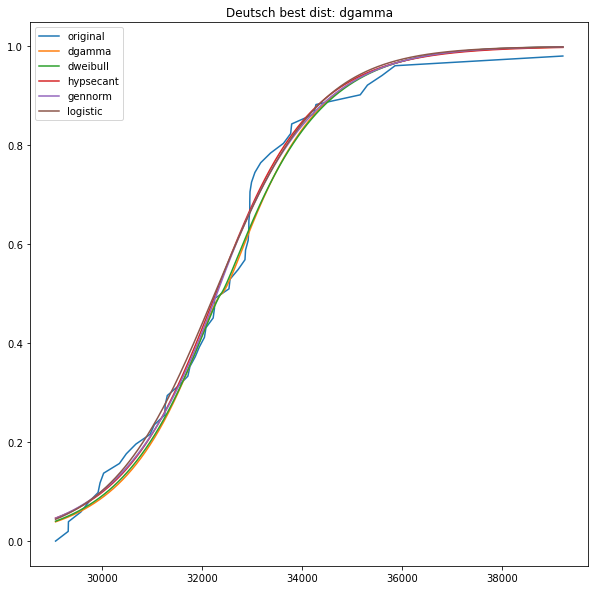

c:\Users\tobia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


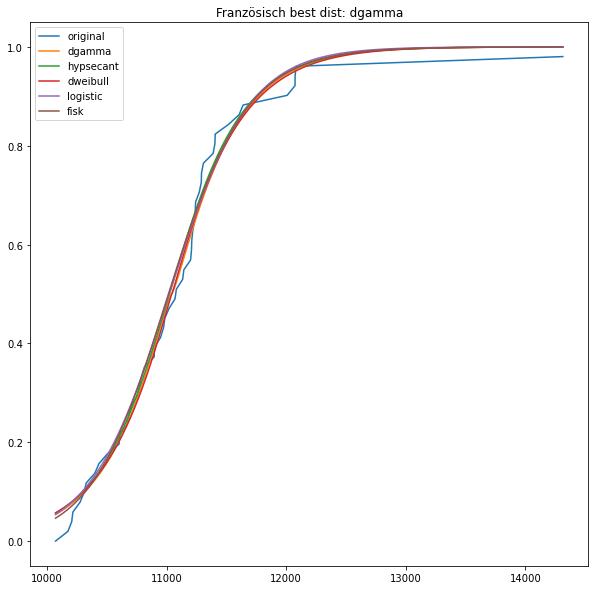

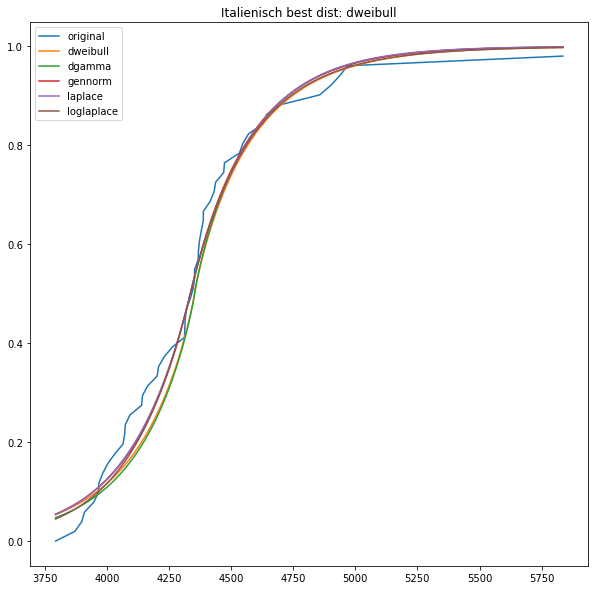

c:\Users\tobia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


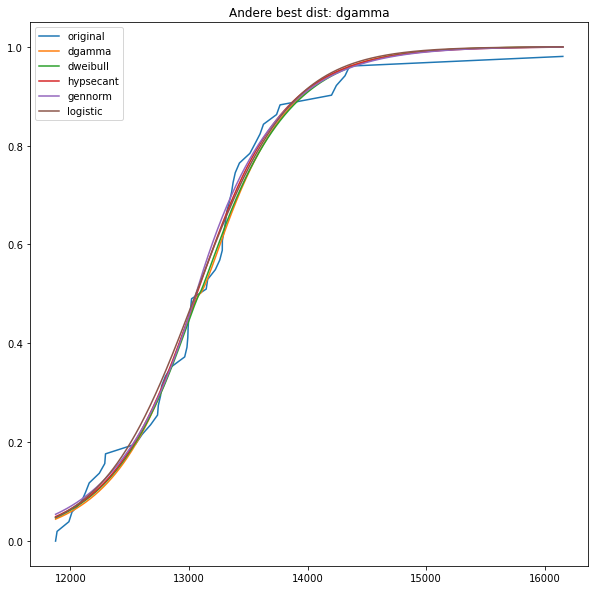

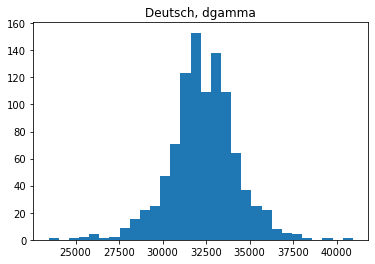

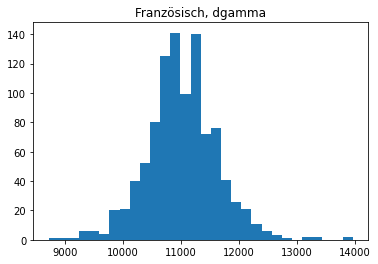

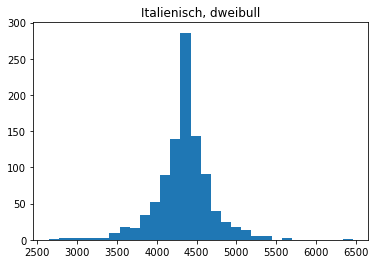

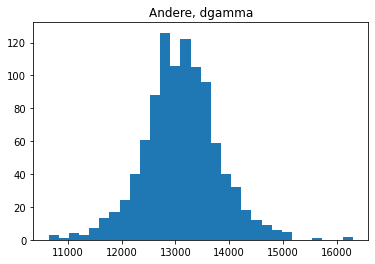

In [4]:


""" df_hauptsprache_mean = get_hauptsprache_kanton("2010")

for year in range(2011, 2021):
    df_hs = get_hauptsprache_kanton(str(year))

    df_hauptsprache_mean = pd.concat((df_hauptsprache_mean, df_hs))

df_mean_hauptsprache = df_hauptsprache_mean.groupby(df_hauptsprache_mean.index).mean()

df_mean_hauptsprache_percent = df_mean_hauptsprache.apply(lambda x: x / x.sum()) """

df_2020_hauptsprache = get_hauptsprache_kanton("2020")

df_2020_hauptsprache_percent = df_2020_hauptsprache.apply(lambda x: x / x.sum())

dict_birthRate_lang_distribution = {}
for year, row in df_deaths.iterrows():
    dict_birthRate_languages = {}

    #iteriere über kantone
    for kanton, birthRate in row.iteritems():
        if kanton in df_2020_hauptsprache_percent.columns:
            #iteriere über sprachenanteil der kantone
            for sprache, langPercent in df_2020_hauptsprache_percent[kanton].iteritems():
                dict_birthRate_languages[sprache] = dict_birthRate_languages.get(sprache, 0) + birthRate * langPercent

    for key, value in list(dict_birthRate_languages.items()):
        item = dict_birthRate_lang_distribution.get(key, [])
        item.append(value)
        dict_birthRate_lang_distribution[key] = item

dict_distributions = {}
for sprache, values in dict_birthRate_lang_distribution.items():
    f = fitter.Fitter(values, timeout=60)
    f.fit()

    method = "sumsquare_error"
    dict_distributions[sprache] = f.get_best(method=method)

    display_distributions_cdf(f, values, sprache, method)


for sprache, dist in dict_distributions.items():
    obj = getattr(stats, list(dist.keys())[0])

    params = dist[list(dist.keys())[0]]
   
    if type(params) is dict:
        params = list(params.values())

    dist_vals = obj.rvs(size=1000,*params)

    plt.hist(dist_vals, bins=30)
    plt.title(sprache + ", " + str(list(dist.keys())[0]))
    plt.show()

dill.dump(dict_distributions, open("distributions_nach_sprache.pick", mode='wb'))